In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv("datalist.csv",index_col=0)

In [20]:
df.head()

,text,voice_id,is_correct
0,vazirlar mahkamasining yangi tarkibi shakllant...,AwACAgIAAxkBAAMnX51d_nSMUcTaZw01ef1lmUsPYC0AAp...,False
1,vazirlar mahkamasi yangi saylangan O'zbekiston...,AwACAgIAAxkBAAM-X56Mzfq30YX1fm8LLfSuz70D8P8AAj...,False
2,qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvi...,AwACAgIAAxkBAANDX56SQK8yOL4ERfQuu6nGuyM6TpAAAk...,False
3,"onasidan mash'um xabarni eshitgandan boshlab, ...",AwACAgIAAxkBAANUX596HbtI-YIkSX1A9nLiYcPPCH4AAm...,False
4,yomon axloqning qalb sofligiga beradigan zarar...,AwACAgIAAxkBAANWX596MkwofNWpbY6tQftOE8bfTVsAAm...,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14250
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        14251 non-null  object
 1   voice_id    14251 non-null  object
 2   is_correct  13414 non-null  object
dtypes: object(3)
memory usage: 445.3+ KB


In [22]:
df.describe()

,text,voice_id,is_correct
count,14251,14251,13414
unique,1463,14251,2
top,qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvi...,AwACAgIAAxkBAAMnX51d_nSMUcTaZw01ef1lmUsPYC0AAp...,True
freq,296,1,10472


<AxesSubplot:>

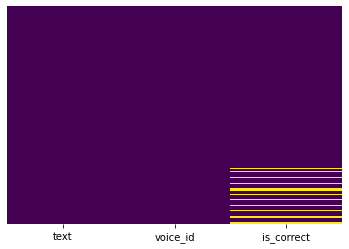

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='is_correct', ylabel='count'>

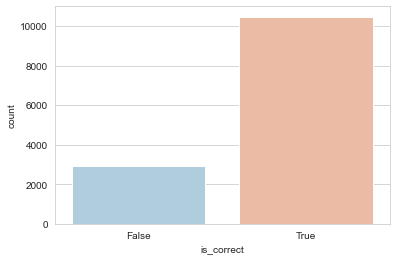

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='is_correct',data=df,palette='RdBu_r')

In [27]:
df["is_correct"].value_counts()

True     10472
False     2942
Name: is_correct, dtype: int64

# Data Cleaning

In [49]:
df.dropna(inplace=True)

In [52]:
df = df[df['is_correct']]

In [57]:
df.reset_index(drop=True, inplace=True)

In [58]:
df.to_csv("toza.csv")

In [65]:
clean_audios = df['voice_id'].to_numpy()

In [81]:
import os
for filename in os.listdir("voices"):
    if not  filename.split('.')[0] in clean_audios : 
        os.remove("voices/"+filename)
        

In [110]:
len(list(df['voice_id']))

10472

In [111]:
len(set(df['voice_id']))

10472

In [88]:
name_of_files = []
for filename in os.listdir("voices"):
    name_of_files.append(filename.split('.')[0])

In [96]:
not_included = list(set(df['voice_id']) - set(name_of_files) ) 

In [119]:
final = df[~df['voice_id'].isin(not_included)]

In [120]:
len(set(final['voice_id']))

10469

In [122]:
final.reset_index(drop=True, inplace=True)

In [123]:
final.to_csv("final.csv")

In [4]:
final.head()

,text,voice_id,is_correct
0,"Bashorat qilish juda qiyin narsa, ayniqsa kela...",AwACAgIAAxkBAAIK9l-hp4FI_giM4buhcgNnT0HpeDTCAA...,True
1,Hali ham yosh bola ekansan.,AwACAgIAAxkBAAIKtl-hpjazPHo3gWKdgXrX-xmd-N2-AA...,True
2,Bolsheviklar ham xuddi shu ishni qilishadi,AwACAgIAAxkBAAIKeF-hpVGwsfewrkz4SM3ablOvwhuTAA...,True
3,O’zbek musiqiy sana’ti afsonasi Ruslan Sharipo...,AwACAgIAAxkBAAIR_l-i_frVgSlBG16FFxejZJRnLaNKAA...,True
4,AQShda bugun saylov kuni. Har gal saylovlar bo...,AwACAgIAAxkBAAISOl-jAAGcLFVMKHRoJPJVkW0YXW0SZw...,True


In [3]:
final = pd.read_csv("final.csv",index_col=0)

In [175]:
concatenated["client_id"] = np.nan
concatenated["up_votes"] = np.nan
concatenated["down_votes"] = np.nan
concatenated["age"] = np.nan
concatenated["gender"] = np.nan
concatenated["accent"] = np.nan
concatenated["locale"] = np.nan
concatenated["segment"] = np.nan


In [176]:
concatenated.rename(columns={'text': 'sentence', 'voice_id': 'path'}, inplace=True)

In [177]:
concatenated.columns

Index(['sentence', 'path', 'client_id', 'up_votes', 'down_votes', 'age',
       'gender', 'accent', 'locale', 'segment'],
      dtype='object')

In [8]:
final = final.drop('is_correct', 1)

C:\Users\User\anaconda3\envs\trainer\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
final.columns

Index(['sentence', 'path', 'client_id', 'up_votes', 'down_votes', 'age',
       'gender', 'accent', 'locale', 'segment'],
      dtype='object')

In [178]:
def changer(x):
    return x+".mp3"

In [179]:
concatenated['path'] =  concatenated['path'].apply(changer)

In [12]:
final.to_csv("use.tsv", sep='\t',index=False)

In [271]:
train, validate, test = np.split(concatenated.sample(frac=1, random_state=42),
                                 [int(.8*len(concatenated)), int(.9*len(concatenated))])


In [272]:
len(concatenated)

11793

In [273]:
train.to_csv("train.tsv", sep='\t',index=False)
validate.to_csv("validate.tsv", sep='\t',index=False)
test.to_csv("test.tsv", sep='\t',index=False)

In [187]:
!pip install pydub

  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [229]:
import os
from pydub import AudioSegment
# files
# src = input("In: ")
# dst = input("Out: ")
allbraks = []
src = "voices/"+filename
dst = "test/"+filename.split('.')[0]+".mp3"
for filename in os.listdir("clean_data/voices"):
    sound = AudioSegment.from_ogg("clean_data/voices/"+filename)
    sound.export("clean_data/voices/"+filename.split('.')[0]+".mp3", format="mp3")
allbraks

[]

In [16]:
!pip install pydub

  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [5]:
#read bot data
df_bot = pd.read_csv("Botdata/data.csv", index_col=0)

In [65]:
df_bot.reset_index(drop=True, inplace=True)

In [68]:
df_bot = df_bot.drop(columns=['index']) 

In [76]:
df_bot

,id,sentence
0,000e24b1-447f-477f-a153-31c7751209ca,“Shohruh sulton Samarqand taxtiga oʻltirgandin...
1,001ff9ff-133d-4f8f-8e7a-5a40b854e07f,Oʻtkazilgan soʻrov va oʻrganishlar natijasiga ...
2,0024f137-7526-4134-8f40-698c8d88ea31,Ayni damda mazkur komplekslarni qurish ishlari...
3,003013f7-57f9-496a-ac3a-e2ebdaa36fc8,"Bu – dunyoga yoyilib ketayotgan ogʻir balo, ti..."
4,0034eef3-8471-430a-b2de-e0fed7ffad63,Bu maqsadlarda Jahon banki mablagʻlaridan 70 m...
...,...,...
1819,ffbe966c-0d9f-4ddb-a658-c75e58e4057f,Birinchi navbatda oʻquvchilar bilan hozirgi sh...
1820,ffeac156-b52b-4dc7-8ce4-d34f936bd036,Hozircha AQSH Milliy xavfsizlik agentligi ayna...
1821,fffce0db-c36e-46fd-b15d-94fd950c0c00,Bu esa xorij davlatlarida bizning sovutgichlar...
1822,fffdc4a5-2337-42c4-9efe-80a25a89dc44,Tadbir doirasida qurilish va meʼmorchilikning ...


In [80]:
name_file = []
import os
for filename in os.listdir("Botdata/data/"):
    name_file.append(filename.split('.')[0])
#     sound = AudioSegment.from_ogg("voices/"+filename)
#     sound.export("voices/"+filename.split('.')[0]+".mp3", format="mp3")

In [87]:
not_in_file = set(df_bot.id) - set(name_file)

In [92]:
for i in list(not_in_file):
    df_bot.drop(df_bot[df_bot.id==i].index)

In [93]:
df_bot

,id,sentence
0,000e24b1-447f-477f-a153-31c7751209ca,“Shohruh sulton Samarqand taxtiga oʻltirgandin...
1,001ff9ff-133d-4f8f-8e7a-5a40b854e07f,Oʻtkazilgan soʻrov va oʻrganishlar natijasiga ...
2,0024f137-7526-4134-8f40-698c8d88ea31,Ayni damda mazkur komplekslarni qurish ishlari...
3,003013f7-57f9-496a-ac3a-e2ebdaa36fc8,"Bu – dunyoga yoyilib ketayotgan ogʻir balo, ti..."
4,0034eef3-8471-430a-b2de-e0fed7ffad63,Bu maqsadlarda Jahon banki mablagʻlaridan 70 m...
...,...,...
1818,ffa4c7dc-1a1e-450b-ae28-3cf3b52731f9,Buning natijasida esa dunyo tillari yaxshigina...
1819,ffbe966c-0d9f-4ddb-a658-c75e58e4057f,Birinchi navbatda oʻquvchilar bilan hozirgi sh...
1820,ffeac156-b52b-4dc7-8ce4-d34f936bd036,Hozircha AQSH Milliy xavfsizlik agentligi ayna...
1821,fffce0db-c36e-46fd-b15d-94fd950c0c00,Bu esa xorij davlatlarida bizning sovutgichlar...


In [105]:
clean_data = pd.read_csv("clean_data/final.csv", index_col=0)

In [109]:
del clean_data['is_correct']

In [114]:
df_bot = df_bot.rename(columns={'sentence': 'text', 'id': 'voice_id'})

In [110]:
clean_data

,text,voice_id
0,"Bashorat qilish juda qiyin narsa, ayniqsa kela...",AwACAgIAAxkBAAIK9l-hp4FI_giM4buhcgNnT0HpeDTCAA...
1,Hali ham yosh bola ekansan.,AwACAgIAAxkBAAIKtl-hpjazPHo3gWKdgXrX-xmd-N2-AA...
2,Bolsheviklar ham xuddi shu ishni qilishadi,AwACAgIAAxkBAAIKeF-hpVGwsfewrkz4SM3ablOvwhuTAA...
3,O’zbek musiqiy sana’ti afsonasi Ruslan Sharipo...,AwACAgIAAxkBAAIR_l-i_frVgSlBG16FFxejZJRnLaNKAA...
4,AQShda bugun saylov kuni. Har gal saylovlar bo...,AwACAgIAAxkBAAISOl-jAAGcLFVMKHRoJPJVkW0YXW0SZw...
...,...,...
10464,U orqali Siz dunyoning ixtiyoriy nuqtasidagi e...,AwACAgIAAxkBAAK13WA0qhBCwfcVoZ9EDiJYYXb-811gAA...
10465,Agar siz qirg'oqni ko'rishni yo'qotishdan qo'r...,AwACAgIAAxkBAAK1IWA0qKBKZdOfUOQ_jh1MtWp4L6xhAA...
10466,"Bu o'ziga xos yoqilg'i quyish shoxobchasi, bun...",AwACAgIAAxkBAAK3nGA0rSfkxMpIrWBA31tG6yBTQW6uAA...
10467,faqat ular ham bizdek o‘ylagan vaqtda.,AwACAgIAAxkBAAK2HGA0qmem_maOzLQ_W5pvdrhimHnSAA...


In [115]:
concatenated = pd.concat([clean_data, df_bot])

In [116]:
concatenated

,text,voice_id
0,"Bashorat qilish juda qiyin narsa, ayniqsa kela...",AwACAgIAAxkBAAIK9l-hp4FI_giM4buhcgNnT0HpeDTCAA...
1,Hali ham yosh bola ekansan.,AwACAgIAAxkBAAIKtl-hpjazPHo3gWKdgXrX-xmd-N2-AA...
2,Bolsheviklar ham xuddi shu ishni qilishadi,AwACAgIAAxkBAAIKeF-hpVGwsfewrkz4SM3ablOvwhuTAA...
3,O’zbek musiqiy sana’ti afsonasi Ruslan Sharipo...,AwACAgIAAxkBAAIR_l-i_frVgSlBG16FFxejZJRnLaNKAA...
4,AQShda bugun saylov kuni. Har gal saylovlar bo...,AwACAgIAAxkBAAISOl-jAAGcLFVMKHRoJPJVkW0YXW0SZw...
...,...,...
1818,Buning natijasida esa dunyo tillari yaxshigina...,ffa4c7dc-1a1e-450b-ae28-3cf3b52731f9
1819,Birinchi navbatda oʻquvchilar bilan hozirgi sh...,ffbe966c-0d9f-4ddb-a658-c75e58e4057f
1820,Hozircha AQSH Milliy xavfsizlik agentligi ayna...,ffeac156-b52b-4dc7-8ce4-d34f936bd036
1821,Bu esa xorij davlatlarida bizning sovutgichlar...,fffce0db-c36e-46fd-b15d-94fd950c0c00


In [124]:
lastone = pd.read_csv("uz/train.tsv",sep='\t')
lasttwo = pd.read_csv("uz/validated.tsv",sep='\t')

In [126]:
total = pd.concat([lastone, lasttwo])

In [141]:
new = total[["sentence","path"]]

In [173]:
concatenated = concatenated.reset_index(drop=True)

In [143]:
new = new.rename(columns={'sentence': 'text', 'path': 'voice_id'})

In [157]:
len(new['voice_id'].to_numpy())

288

In [167]:
len(set(new['voice_id']))

161

In [269]:
import os
for filename in os.listdir("clips/"):
    if filename in a:
        os.remove("clips/"+filename)

In [256]:
concatenated = concatenated.drop(concatenated[concatenated['path']=="9dc8230c-d3ad-4e85-acb5-378364bb84b4.mp3"].index)

In [211]:
concatenated[concatenated['path']=="017e56e9-ef33-4e8e-b912-8511e045c305.mp3"].index

Int64Index([], dtype='int64')

In [234]:
concatenated = concatenated[~concatenated['path'].isin()]

TypeError: 'Series' object is not callable

In [236]:
(set(concatenated['path']))-(set(total_files))

set()

In [218]:
len(set(concatenated.path))

12225

In [223]:
sum(concatenated['path'].isin(newlist))

56

In [222]:
newlist = []
for i in allbraks:
    newlist.append(i+".mp3")

In [254]:
concatenated[concatenated['path']=="599064ab-ca53-4bd8-b04b-7fb7c2024196.mp3"]

,sentence,path,client_id,up_votes,down_votes,age,gender,accent,locale,segment
11067,"Darhaqiqat, sӱnggi yillarda fuqarolarning ӱzin...",599064ab-ca53-4bd8-b04b-7fb7c2024196.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
concatenated["is_dig"]

,sentence,path,client_id,up_votes,down_votes,age,gender,accent,locale,segment
0,"Bashorat qilish juda qiyin narsa, ayniqsa kela...",AwACAgIAAxkBAAIK9l-hp4FI_giM4buhcgNnT0HpeDTCAA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hali ham yosh bola ekansan.,AwACAgIAAxkBAAIKtl-hpjazPHo3gWKdgXrX-xmd-N2-AA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bolsheviklar ham xuddi shu ishni qilishadi,AwACAgIAAxkBAAIKeF-hpVGwsfewrkz4SM3ablOvwhuTAA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,O’zbek musiqiy sana’ti afsonasi Ruslan Sharipo...,AwACAgIAAxkBAAIR_l-i_frVgSlBG16FFxejZJRnLaNKAA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AQShda bugun saylov kuni. Har gal saylovlar bo...,AwACAgIAAxkBAAISOl-jAAGcLFVMKHRoJPJVkW0YXW0SZw...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12221,Buning natijasida esa dunyo tillari yaxshigina...,ffa4c7dc-1a1e-450b-ae28-3cf3b52731f9.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12222,Birinchi navbatda oʻquvchilar bilan hozirgi sh...,ffbe966c-0d9f-4ddb-a658-c75e58e4057f.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12223,Hozircha AQSH Milliy xavfsizlik agentligi ayna...,ffeac156-b52b-4dc7-8ce4-d34f936bd036.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12224,Bu esa xorij davlatlarida bizning sovutgichlar...,fffce0db-c36e-46fd-b15d-94fd950c0c00.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [259]:
concatenated["is_dig"] = concatenated["sentence"].apply(hasNumbers)

In [261]:
sum(concatenated["is_dig"])

372

In [266]:
a = concatenated[concatenated["is_dig"]]['path'].to_numpy()

In [268]:
concatenated = concatenated[~concatenated['path'].isin(a)]

In [270]:
len(concatenated)

11793